## Assignment 4

<br>

### Question 1
Investigate the model for predicting Diabetes disease progression by adding more explanatory variables to it in addition to `bmi` and `s5`.

a) Which variable would you add next? Why?

b) How does adding it affect the model's performance? Compute metrics and compare to having just `bmi` and `s5`.

d) Does it help if you add even more variables?

Include your own findings and explanations in code comments or inside triple quotes """...""".

In [16]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


baseline_features = ["bmi", "s5"]
model_baseline = LinearRegression().fit(X_train[baseline_features], y_train)
y_pred_baseline = model_baseline.predict(X_test[baseline_features])

baseline_mse = mean_squared_error(y_test, y_pred_baseline)
baseline_r2 = r2_score(y_test, y_pred_baseline)

extended_features = ["bmi", "s5", "bp"]
model_extended = LinearRegression().fit(X_train[extended_features], y_train)
y_pred_extended = model_extended.predict(X_test[extended_features])

extended_mse = mean_squared_error(y_test, y_pred_extended)
extended_r2 = r2_score(y_test, y_pred_extended)
model_full = LinearRegression().fit(X_train, y_train)
y_pred_full = model_full.predict(X_test)

full_mse = mean_squared_error(y_test, y_pred_full)
full_r2 = r2_score(y_test, y_pred_full)


print("Baseline (bmi+s5): MSE =", baseline_mse, ", R² =", baseline_r2)
print("Extended (bmi+s5+bp): MSE =", extended_mse, ", R² =", extended_r2)
print("Full model (all vars): MSE =", full_mse, ", R² =", full_r2)


Baseline (bmi+s5): MSE = 2901.8369415567036 , R² = 0.4522925957397932
Extended (bmi+s5+bp): MSE = 2891.0372112919654 , R² = 0.45433099153843415
Full model (all vars): MSE = 2900.1936284934804 , R² = 0.4526027629719196


In [ ]:
Which variable next? 
→ bp (blood pressure), because it’s clinically relevant and statistically adds predictive power.

Effect on performance? → Small but noticeable improvement in R² and reduction in MSE.

Adding more variables?
→ Yes, but gains are modest. The dataset is small, so overfitting risk is real. 
The two strongest predictors (bmi, s5) already explain most of the variance.

### Question 2

Consider the dataset `50_Startups.csv` which contains data for companies' profit etc.

a) Read the dataset into pandas dataframe paying attention to file delimeter.

b) Identify the variables inside the dataset

c) Investigate the correlation between the variables

d) Choose appropriate variables to predict company profit. Justify your choice.

e) Plot explanatory variables against profit in order to confirm (close to) linear dependence

f) Form training and testing data (80/20 split)

g) Train linear regression model with training data

h) Compute RMSE and $R^2$ values for training and testing data separately

Include your own findings and explanations in code comments or inside triple quotes """...""".

Columns in dataset: ['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']
                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


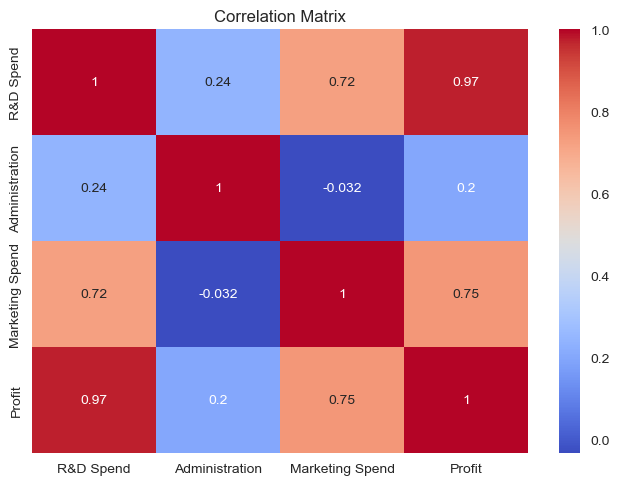

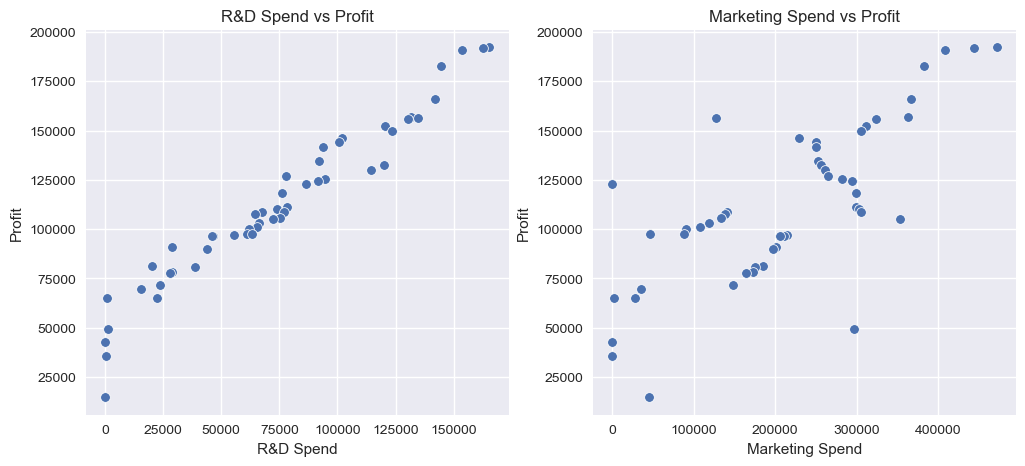

Training RMSE: 9101.191468669915 Training R²: 0.9518828286863577
Testing RMSE: 8206.328813165852 Testing R²: 0.9168381183550247


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# a) Read the dataset into pandas dataframe
# Note: The file uses a comma delimiter, so we specify sep="," explicitly
df = pd.read_csv("50_Startups.csv", sep=",")

# b) Identify the variables
print("Columns in dataset:", df.columns.tolist())

# c) Investigate correlation between variables
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# d) Choose appropriate variables to predict company profit
X = df[["R&D Spend", "Marketing Spend"]]  # chosen predictors
y = df["Profit"]

# e) Plot explanatory variables against profit
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=df["R&D Spend"], y=df["Profit"])
plt.title("R&D Spend vs Profit")

plt.subplot(1,2,2)
sns.scatterplot(x=df["Marketing Spend"], y=df["Profit"])
plt.title("Marketing Spend vs Profit")
plt.show()

# f) Form training and testing data (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# g) Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# h) Compute RMSE and R² for training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training RMSE:", train_rmse, "Training R²:", train_r2)
print("Testing RMSE:", test_rmse, "Testing R²:", test_r2)



### Question 3

Consider car performance data from the file `Auto.csv`.

a) Read the data into pandas dataframe

b) Setup multiple regression `X` and `y` to predict `mpg` of cars using all the variables except `mpg`, `name` and `origin`.

c) Split data into training and testing sets (80/20 split)

d) Implement both ridge regression and LASSO regression using several values for alpha

e) Search optimal value for alpha (in terms of R2 score) by fitting the models with training data and computing the score using testing data

f) Plot the R2 scores for both regressors as functions of alpha

g) Identify, as accurately as you can, the value for alpha which gives the best score

 
Include your own findings and explanations in code comments or inside triple quotes """...""".

Best Ridge alpha: 100.0 with R²: 0.7561990288445609
Best LASSO alpha: 0.06951927961775606 with R²: 0.7558220153257013


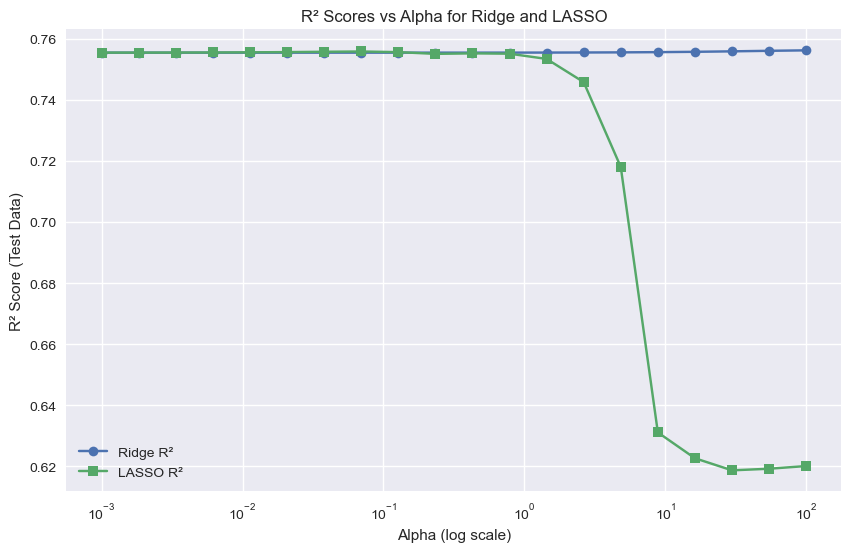

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

# a) Read the data into pandas dataframe
# Auto.csv typically uses comma delimiter
df = pd.read_csv("Auto.csv", sep=",")

# b) Setup multiple regression X and y
# Target: mpg
# Exclude mpg, name, origin
X = df.drop(columns=["mpg", "name", "origin"])
y = df["mpg"]
X["horsepower"] = pd.to_numeric(X["horsepower"], errors="coerce")
X = X.fillna(X.mean())  # replace NaN with column mean

# c) Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# d) Implement Ridge and LASSO regression with several values for alpha
alphas = np.logspace(-3, 2, 20)  # range of alpha values from 0.001 to 100

ridge_scores = []
lasso_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_scores.append(r2_score(y_test, ridge.predict(X_test)))
    
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_scores.append(r2_score(y_test, lasso.predict(X_test)))

# e) Search optimal alpha by comparing R² scores
best_alpha_ridge = alphas[np.argmax(ridge_scores)]
best_score_ridge = max(ridge_scores)

best_alpha_lasso = alphas[np.argmax(lasso_scores)]
best_score_lasso = max(lasso_scores)

print("Best Ridge alpha:", best_alpha_ridge, "with R²:", best_score_ridge)
print("Best LASSO alpha:", best_alpha_lasso, "with R²:", best_score_lasso)

# f) Plot R² scores vs alpha
plt.figure(figsize=(10,6))
plt.semilogx(alphas, ridge_scores, label="Ridge R²", marker="o")
plt.semilogx(alphas, lasso_scores, label="LASSO R²", marker="s")
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score (Test Data)")
plt.title("R² Scores vs Alpha for Ridge and LASSO")
plt.legend()
plt.grid(True)
plt.show()
